In [54]:
from keras.models import Model
from keras.layers import Dense #This is the layer which shows the layer is connected to all previous neuron
from keras.layers import Input
#from sklearn.datasets import make_circles
#from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from keras.layers import Conv2D, MaxPool2D, Flatten,Dropout

In [2]:
data=pd.read_csv("mnist_train_small.csv").values

In [5]:
X=data[:,2:].reshape(-1,28,28,1) #One is single depth which conv takes

In [6]:
y=data[:,1]

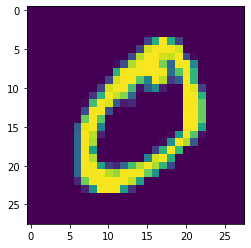

In [7]:
plt.imshow(X[0].reshape(28,28)) # Converts the imgae to 2d without depth

In [8]:
ohe=OneHotEncoder(categories="auto")

In [9]:
y_hot=ohe.fit_transform(y.reshape(-1,1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

In [11]:
model=Model()

W0706 18:43:33.462979  2608 deprecation_wrapper.py:119] From c:\users\tanish saxena\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [12]:
X.shape

(8000, 28, 28, 1)

In [56]:
in_layer=Input(shape=[28,28,1])# This is showing inputs of first layer
layer_1=Conv2D(32,(3,3), activation="relu")(in_layer)
layer_2=MaxPool2D()(layer_1)
layer_3=Conv2D(64,(3,3), activation="relu")(layer_2)
layer_4=MaxPool2D()(layer_3)
drop=Dropout(.25)(layer_4) #This will switch of 25% neurons
layer_5=Conv2D(128,(3,3), activation="relu")(drop)
layer_6=MaxPool2D()(layer_5)

flatten=Flatten()(layer_6)

d1=Dense(400,activation="relu")(flatten)
d2=Dense(100,activation="relu")(d1)
d3=Dense(50,activation="relu")(d2)
out=Dense(10,activation="softmax")(d3)

In [57]:
model=Model(inputs=[in_layer],outputs=[out])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [59]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [60]:
hist=model.fit(X_train,y_train,epochs=6,batch_size=200)

Epoch 1/6
5360/5360 [==============================] - 7s 1ms/step - loss: 4.1958 - acc: 0.2795
Epoch 2/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.9240 - acc: 0.7196
Epoch 3/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.4090 - acc: 0.8780
Epoch 4/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.2780 - acc: 0.9190
Epoch 5/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.2097 - acc: 0.9384
Epoch 6/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.1835 - acc: 0.9446


In [61]:
model.evaluate(X_test,y_test)

2640/2640 [==============================] - 1s 441us/step


[0.15723300283831176, 0.95]

[[4 3 9 7 8 5 6 2 0 1]]


array([1], dtype=int64)

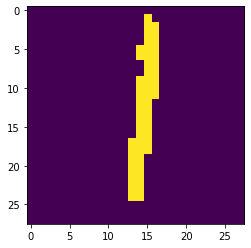

In [73]:
import cv2
one=cv2.imread("one.jpeg")
gray=cv2.cvtColor(one,cv2.COLOR_BGR2GRAY)
small=cv2.resize(gray,(28,28))
small=(small<100).astype(int) * 255 #tHIS IS THE PROCESS OF DATA CLEANING LIKE CONVERTING THE DATA IN WHICH MODEL CAN TRAIN AMAZINGLY
print(np.argsort(model.predict(np.array([small.reshape(28,28,1)]))))
plt.imshow(small)
np.argmax(model.predict(np.array([small.reshape(28,28,1)])),axis=1)

[[3 4 1 5 9 7 0 6 2 8]]


array([8], dtype=int64)

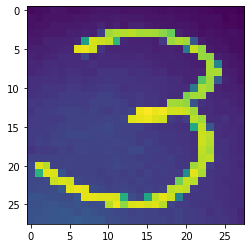

In [77]:
import cv2
one=cv2.imread("three.jpeg")
gray=cv2.cvtColor(one,cv2.COLOR_BGR2GRAY)
small=cv2.resize(gray,(28,28))
small=255-small
print(np.argsort(model.predict(np.array([small.reshape(28,28,1)]))))
plt.imshow(small)
np.argmax(model.predict(np.array([small.reshape(28,28,1)])),axis=1)